In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import sklearn

In [95]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [96]:
pd.get_dummies(df['Dependents']).sum()

0     345
1     102
2     101
3+     51
dtype: int64

In [97]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can observe null values are present in few columns.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Handilng missing values using Simple Imputer

In [101]:
from sklearn.impute import SimpleImputer
Imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Imp_Categorical = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df['Gender'] = Imp_Categorical.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = Imp_Categorical.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = Imp_Categorical.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed'] = Imp_Categorical.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['LoanAmount'] = Imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = Imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = Imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [102]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null values are eliminated.

There multiple categorical columns including target coumn. Hence we will use label encoder.

In [103]:
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])
df['Loan_ID'].value_counts()

0      1
412    1
405    1
406    1
407    1
      ..
205    1
206    1
207    1
208    1
613    1
Name: Loan_ID, Length: 614, dtype: int64

In [104]:
df['Education'] = le.fit_transform(df['Education'])
df['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [105]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [106]:
df['Married']= le.fit_transform(df['Married'])
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [107]:
df['Dependents']= le.fit_transform(df['Dependents'])
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [108]:
df['Self_Employed']= le.fit_transform(df['Self_Employed'])
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [109]:
df['Property_Area']= le.fit_transform(df['Property_Area'])
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [110]:
df['Loan_Status']= le.fit_transform(df['Loan_Status'])
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

EDA

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

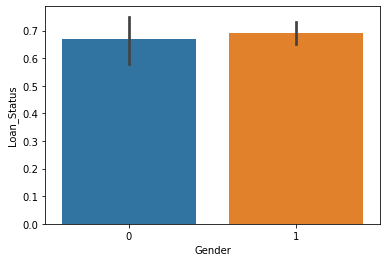

In [111]:
sns.barplot(x=df['Gender'],y=df['Loan_Status'])

Mens have slightly more approvals compare to female.

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

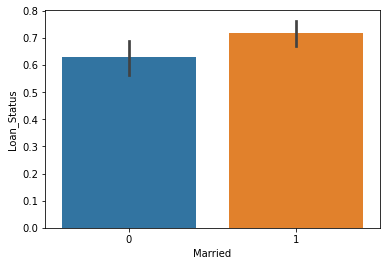

In [112]:
sns.barplot(x=df['Married'],y=df['Loan_Status'])

Married people have more approvals compared to unmarried.

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

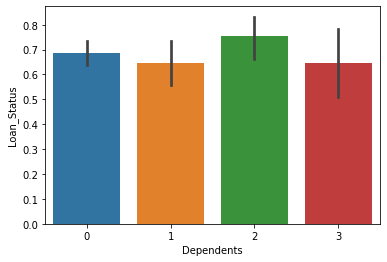

In [113]:
sns.barplot(x=df['Dependents'],y=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

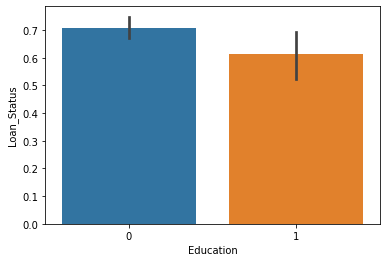

In [114]:
sns.barplot(x=df['Education'],y=df['Loan_Status'])

Graduate people seems to get loan approved compared to Non graduate.

In [115]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

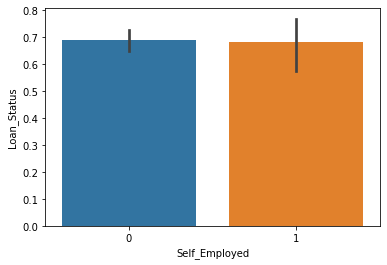

In [116]:
sns.barplot(x=df['Self_Employed'],y=df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

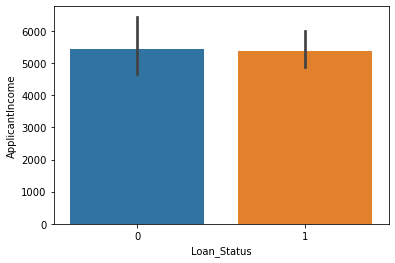

In [117]:
sns.barplot(x=df['Loan_Status'],y=df['ApplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

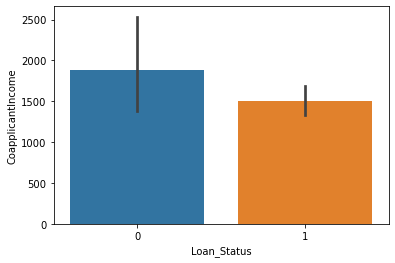

In [118]:
sns.barplot(x=df['Loan_Status'],y=df['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

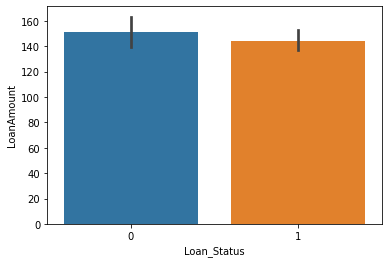

In [119]:
sns.barplot(x=df['Loan_Status'],y=df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

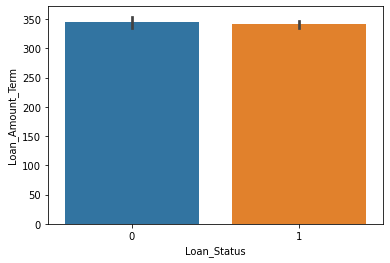

In [120]:
sns.barplot(x=df['Loan_Status'],y=df['Loan_Amount_Term'])

In [121]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

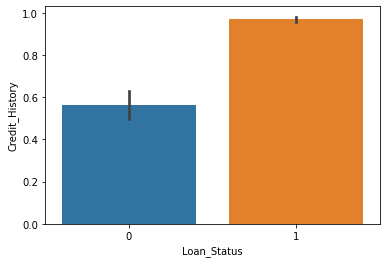

In [122]:
sns.barplot(x=df['Loan_Status'],y=df['Credit_History'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

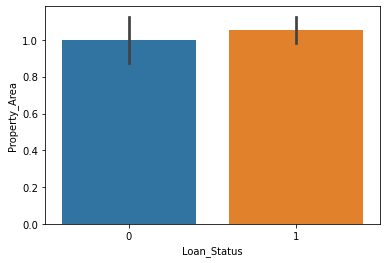

In [123]:
sns.barplot(x=df['Loan_Status'],y=df['Property_Area'])

array([[<AxesSubplot:title={'center':'Loan_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>],
       [<AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

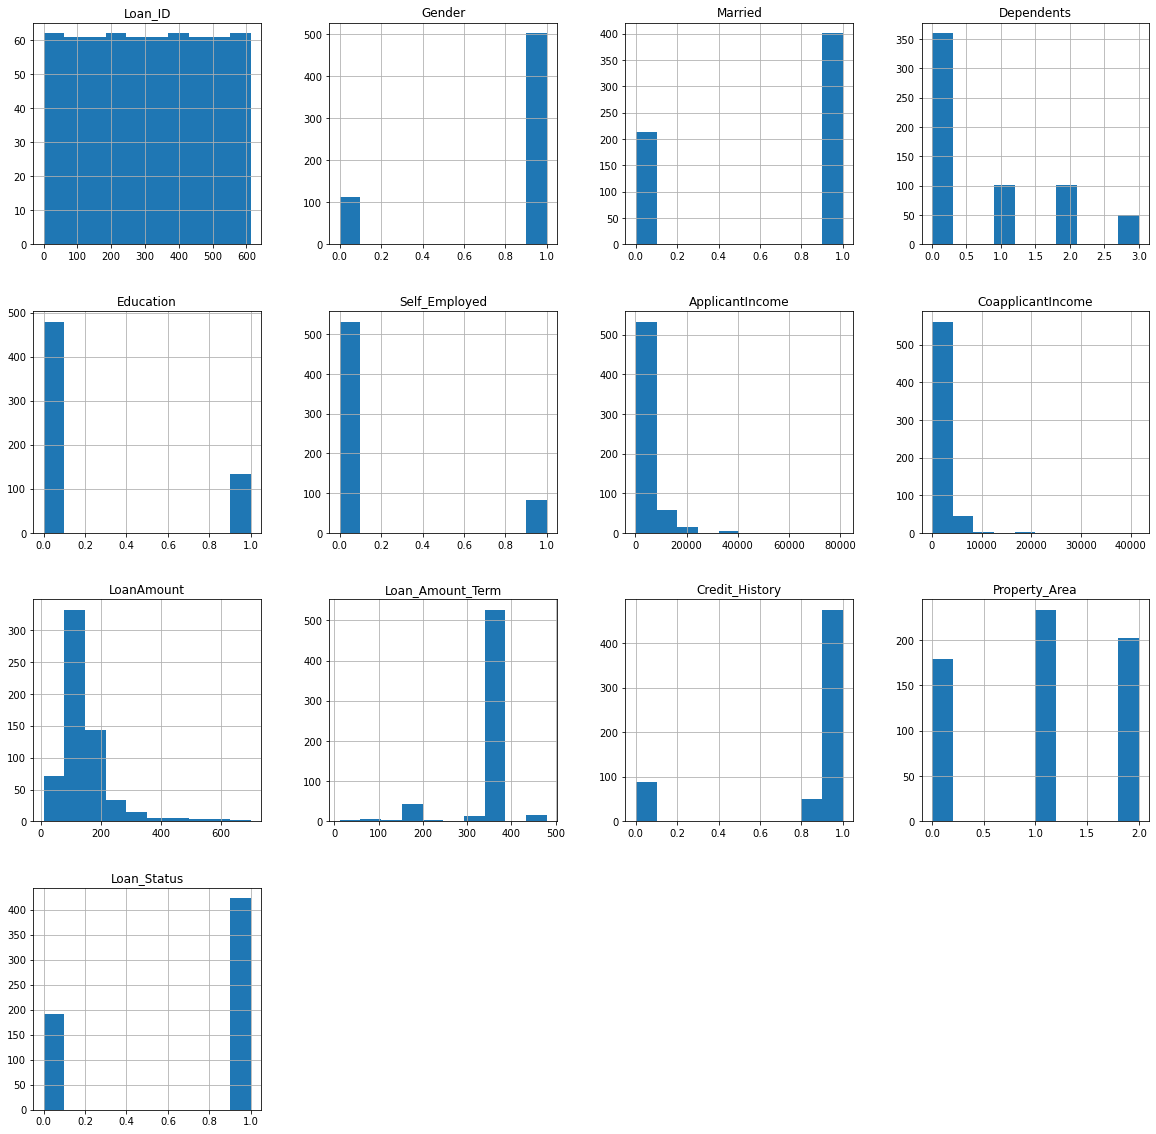

In [124]:
df.hist(figsize=(20,20))

Loan ID can be droppped.

In [125]:
df.drop('Loan_ID',axis=1,inplace=True)

In [126]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Key observations:
1) There is slight difference in 50% and mean values for few columns which indicates skewness in data.             
2) ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term has difference in 75% and max values which indicates outliers in these columns.

Checking correlation

In [127]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

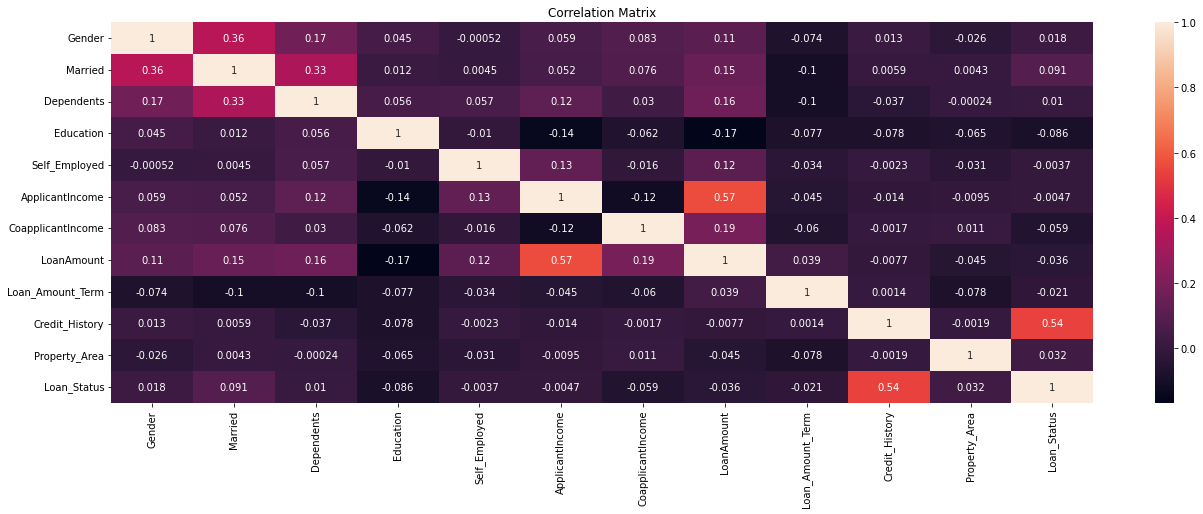

In [128]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Observations:
1) Credit history highly positively correlated to Loan Status.
2) CoapplicantIncome is highly negatively correlated to Loan status.
    

Checking multicollinearity

In [129]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [130]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27985054,
         0.45164045,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.45164045, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.45164045,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.45164045,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.45164045,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27985054,
        -2.41044061, -0.04760721]])

In [134]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.170065,Gender
1,1.281481,Married
2,1.164040,Dependents
3,1.064347,Education
4,1.023725,Self_Employed
5,1.630887,ApplicantIncome
6,1.140816,CoapplicantIncome
7,1.710373,LoanAmount
8,1.049586,Loan_Amount_Term
9,1.008661,Credit_History


As all values are less than 5, very less multicollinearity present in dataset.

Handling skewness

In [135]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [140]:
columns = ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History')

for items in columns:
    if df.skew().loc[items]>0.55:
        df[items] = np.log1p(df[items])

In [141]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.535783
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness has been reduced and lies in range 0.06 to -2.3

Checking Outliers and handling outliers

Gender                  AxesSubplot(0.125,0.772143;0.352273x0.107857)
Married              AxesSubplot(0.547727,0.772143;0.352273x0.107857)
Dependents              AxesSubplot(0.125,0.642714;0.352273x0.107857)
Education            AxesSubplot(0.547727,0.642714;0.352273x0.107857)
Self_Employed           AxesSubplot(0.125,0.513286;0.352273x0.107857)
ApplicantIncome      AxesSubplot(0.547727,0.513286;0.352273x0.107857)
CoapplicantIncome       AxesSubplot(0.125,0.383857;0.352273x0.107857)
LoanAmount           AxesSubplot(0.547727,0.383857;0.352273x0.107857)
Loan_Amount_Term        AxesSubplot(0.125,0.254429;0.352273x0.107857)
Credit_History       AxesSubplot(0.547727,0.254429;0.352273x0.107857)
Property_Area              AxesSubplot(0.125,0.125;0.352273x0.107857)
Loan_Status             AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

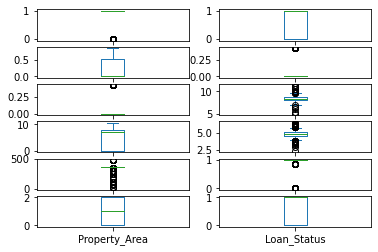

In [143]:
df.plot(kind='box',subplots=True,layout=(6,2))

In [144]:
z = np.abs(zscore(df))
threshold =3
np.where(z>3)

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
        185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
        555, 561, 568, 575, 585, 600], dtype=int64),
 array([7, 8, 8, 7, 8, 7, 7, 8, 5, 7, 5, 7, 5, 5, 5, 8, 8, 8, 5, 7, 5, 5,
        5, 8, 8, 8, 7, 7, 7, 8, 8, 5], dtype=int64))

In [145]:
df = df[(z<3).all(axis=1)]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,0.526589,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0.000000,0.000000,0.423036,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0.000000,0.423036,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0,1
610,1,1,0.869742,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0,1
611,1,1,0.526589,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2,1
612,1,1,0.741276,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2,1


Percentage Data loss

In [146]:
Data_loss = ((614-587)/614)*100
Data_loss

4.397394136807818

In [154]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.7586206896551724
Accuracy score for random state:  0  is  0.7142857142857143
Accuracy score for random state:  0  is  0.812807881773399
Accuracy score for random state:  0  is  0.6551724137931034
Accuracy score for random state:  0  is  0.8226600985221675
Accuracy score for random state:  1  is  0.6896551724137931
Accuracy score for random state:  1  is  0.6502463054187192
Accuracy score for random state:  1  is  0.7635467980295566
Accuracy score for random state:  1  is  0.6206896551724138
Accuracy score for random state:  1  is  0.7733990147783252
Accuracy score for random state:  2  is  0.6847290640394089
Accuracy score for random state:  2  is  0.6798029556650246
Accuracy score for random state:  2  is  0.7783251231527094
Accuracy score for random state:  2  is  0.6157635467980296
Accuracy score for random state:  2  is  0.7832512315270936
Accuracy score for random state:  3  is  0.6896551724137931
Accuracy score for random state:  3  is  

We can observe the highest accuracy Score:0.8522167487684729 is at random state 13 and for model: LogisticRegression.

Best Parameter

In [170]:
Lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [173]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=0.33,random_state=13)
Lr = LogisticRegression()
parameters={'n_jobs': range(30)}
gridsearch =GridSearchCV(Lr,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_jobs': 1}

In [174]:
Lr1 = LogisticRegression(solver='lbfgs')
Lr1.fit(x_train,y_train)
predictions = Lr1.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.7536945812807881


Accuracy score is 75% with LogisticRegression

In [176]:
score = cross_val_score(Lr1,x,y,cv=5)

In [177]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.81300813 0.77235772 0.7804878  0.84552846 0.81147541]
Mean Score:  0.8045715047314408
std Score:  0.02613068941485059
